### Up-sampling

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import os
from IPython.display import display

In [2]:
os.listdir('images')

['AT3_1m4_01.tif',
 'AT3_1m4_02.tif',
 'AT3_1m4_03.tif',
 'AT3_1m4_04.tif',
 'AT3_1m4_05.tif',
 'AT3_1m4_06.tif',
 'AT3_1m4_07.tif',
 'AT3_1m4_08.tif',
 'AT3_1m4_09.tif',
 'AT3_1m4_10.tif',
 'autumn.tif',
 'baby.jpg',
 'bag.png',
 'blobs.png',
 'board.tif',
 'cameraman.tif',
 'canoe.tif',
 'car1.jpg',
 'car2.jpg',
 'car_1.jpg',
 'car_2.jpg',
 'car_3.jpg',
 'car_4.jpg',
 'cell.tif',
 'circbw.tif',
 'circles.png',
 'circlesBrightDark.png',
 'circuit.tif',
 'coins.png',
 'coloredChips.png',
 'concordaerial.png',
 'concordorthophoto.png',
 'eight.tif',
 'eSFRTestImage.jpg',
 'fabric.png',
 'flamingos.jpg',
 'foggyroad.jpg',
 'foggysf1.jpg',
 'foggysf2.jpg',
 'foosball.jpg',
 'foosballraw.tiff',
 'football.jpg',
 'forest.tif',
 'gantrycrane.png',
 'glass.png',
 'greens.jpg',
 'hallway.jpg',
 'hands1-mask.png',
 'hands1.jpg',
 'hands2.jpg',
 'hestain.png',
 'hotcoffee.tif',
 'indiancorn.jpg',
 'kids.tif',
 'kobi.png',
 'liftingbody.png',
 'lighthouse.png',
 'llama.jpg',
 'logo.tif',
 'lowlig

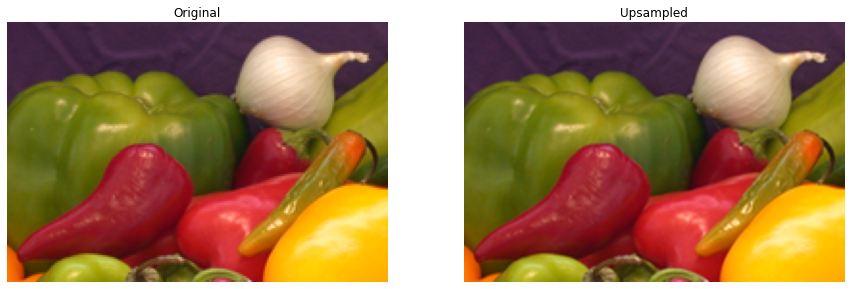

In [45]:
# read image
im1 = Image.open('images/onion.png')

# up-sample image
im2 = im1.resize((im1.width*10, im1.height*10))

plt.figure(figsize=(15,30))
plt.subplot(1, 2, 1), plt.imshow(im1), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(im2), plt.title('Upsampled'), plt.axis('off')
plt.show()

### Down-sampling

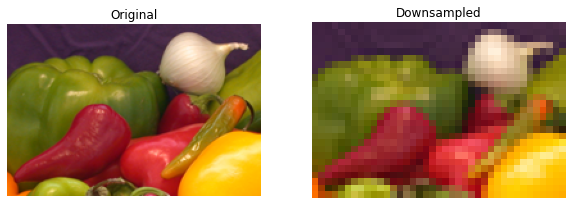

In [52]:
# read image
im1 = Image.open('images/onion.png')

# up-sample image
im2 = im1.resize((im1.width//5, im1.height//5), Image.ANTIALIAS)

plt.figure(figsize=(10,20))
plt.subplot(121), plt.imshow(im1), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(im2), plt.title('Downsampled'), plt.axis('off')
plt.show()

## Discrete Fourier Transform

In [2]:
import scipy.fft as sf
from scipy import ndimage, misc, signal
import numpy as np
from skimage.color import rgb2gray
from skimage.io import imread, imshow, show

In [2]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

Original image SNR:  1.9400195087326977
Reconstructed image SNR:  1.940019508732698


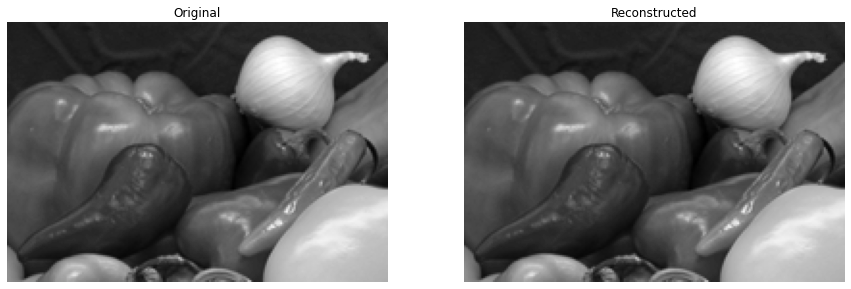

In [5]:
# read image and convert to grayscale
im = np.array(Image.open('images/onion.png').convert('L'))
freq = sf.fft2(im)
im1 = sf.ifft2(freq).real

snr1 = signaltonoise(im, axis=None)
snr2 = signaltonoise(im1, axis=None)
print(f"Original image SNR: ", snr1)
print(f"Reconstructed image SNR: ", snr2)

plt.figure(figsize=(15,30))
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(im1, cmap='gray'), plt.title('Reconstructed'), plt.axis('off')
plt.show()

### Frequency Spectrum with SciPy

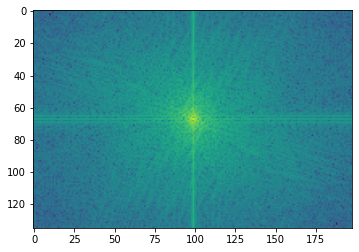

In [6]:
freq2 = sf.fftshift(freq)
# plt.figure(figsize=(10,20))
plt.imshow((20 * np.log10(0.1 + abs(freq2))).astype(int))
plt.show()

### Frequency Spectrum with Numpy FFT

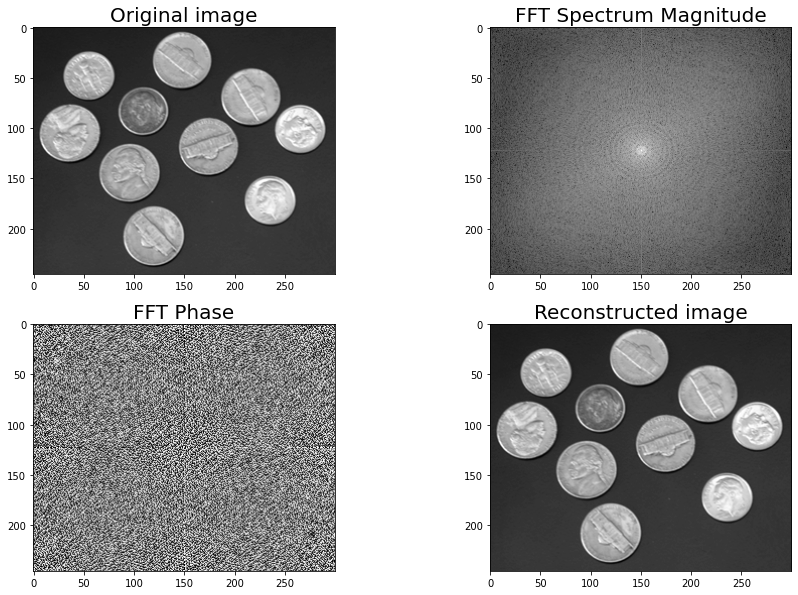

In [29]:
# read image
im1 = imread('images/coins.png', as_gray=True)

# find fft
freq1 = np.fft.fft2(im1)
im2 = np.abs(np.fft.ifft2(freq1))
magnitude = 20 * np.log10(0.01 + np.abs(np.fft.fftshift(freq1)))
phase = np.angle(np.fft.fftshift(freq1))

# plot original & reconstructed image and FFT magnitude & phase
plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(im1, cmap='gray'), plt.title('Original image', size=20)
plt.subplot(222), plt.imshow(magnitude, cmap='gray'), plt.title('FFT Spectrum Magnitude', size=20)
plt.subplot(223), plt.imshow(phase, cmap='gray'), plt.title('FFT Phase', size=20)
plt.subplot(224), plt.imshow(im2, cmap='gray'), plt.title('Reconstructed image', size=20)
plt.show()

### Convolution

In [ ]:
plt.imshow(